<a href="https://colab.research.google.com/github/mabittar/FinancialData/blob/master/technical_analysis/YFinance_Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to get financial data from internet?
### US: In this notebook it's show how to use YFinance to get stock data and how to use it
### PT: Nesse notebook será mostrado como obter dados das ações usando YFinance e como tratar tais informações.

This example are part of my project, see all project in:
Esse exemplo é parte do meu projeto, veja o projeto completo em:

[Github](https://github.com/mabittar/FinancialData.git)

In [1]:
#install yfinance libary
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=28fb5625c12167f536cca7d4408e55b3d353cfd8f19ac93af9de1bc2ce750904
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import pandas as pd
import yfinance as yf

In [0]:
tickers = ["F", "MSFT", "FB", "NFLX", "GOOG", "TSLA", "^BVSP", "PETR4.SA", "VALE3.SA", "UGPA3.SA", "ITSA3.SA", "EZTC3.SA"]

Tickers:

F = Ford

MSFT = Microsoft

FB = Facebook

NFLX = Netflix

GOOG = Alphabet (google)

TSLA = Tesla  

^BVSP = Indice Bovespa

PETR4.SA = Petrobras

VALE3.SA = VALE

UGPA3.SA = Ultrapar

ITSA4.SA = Itausa

EZTC3.SA = EZTEC



In [4]:
#Import tickers data from Yfinance
manystocks = yf.download(tickers, start = "2016-01-01", end = "2020-04-03", period = "1d")

[*********************100%***********************]  12 of 12 completed


In [5]:
#Show data
manystocks.head()
# this data is agroupped by type (Close, High, Low, Close....)

Adj Close                         ...     Volume                      
            EZTC3.SA          F          FB  ...   UGPA3.SA   VALE3.SA      ^BVSP
Date                                         ...                                 
2016-01-04  6.843460  11.030844  102.220001  ...  4129400.0  4587900.0  2976300.0
2016-01-05  6.962821  10.833439  102.730003  ...  2680400.0  2693500.0  2557200.0
2016-01-06  6.849141  10.351781  102.970001  ...  2004600.0  6758900.0  3935900.0
2016-01-07  6.820718  10.028039   97.919998  ...  3137200.0  6450400.0  4032300.0
2016-01-08  6.991238   9.901700   97.330002  ...  4122200.0  4429400.0  3221600.0

[5 rows x 72 columns]

In [6]:
#group data by the name of the tickers
manystocks_groupby = yf.download(tickers, start = "2016-01-01", end = "2020-04-03", period = "1d", group_by= "Ticker")
manystocks_groupby.head()

[*********************100%***********************]  12 of 12 completed


FB              ...        GOOG           
                  Open        High  ...   Adj Close     Volume
Date                                ...                       
2016-01-04  101.949997  102.239998  ...  741.840027  3272800.0
2016-01-05  102.889999  103.709999  ...  742.580017  1950700.0
2016-01-06  101.129997  103.769997  ...  743.619995  1947000.0
2016-01-07  100.500000  101.430000  ...  726.390015  2963700.0
2016-01-08   99.879997  100.500000  ...  714.469971  2450900.0

[5 rows x 72 columns]

In [7]:
#Filter only adj close data
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()
many_stocks_daily_returns

,EZTC3.SA,F,FB,GOOG,ITSA3.SA,MSFT,NFLX,PETR4.SA,TSLA,UGPA3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.017442,-0.017896,0.004989,0.000998,0.004412,0.004562,-0.020917,-0.027657,0.000089,0.022957,-0.013396,0.006597
2016-01-06,-0.016327,-0.044460,0.002336,0.001400,0.011714,-0.018165,0.093071,-0.041916,-0.019648,-0.007140,-0.073482,-0.015229
2016-01-07,-0.004150,-0.031274,-0.049043,-0.023170,-0.015920,-0.034783,-0.026513,-0.021875,-0.015477,-0.040240,-0.059483,-0.025806
2016-01-08,0.025000,-0.012599,-0.006025,-0.016410,0.010294,0.003067,-0.027671,0.001597,-0.021563,0.016057,-0.033914,-0.002040
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-0.104399,-0.011429,-0.040100,-0.043934,0.008155,-0.041061,-0.016171,-0.075747,-0.026128,-0.084556,-0.045238,-0.055089
2020-03-30,-0.031657,-0.030828,0.058422,0.032511,0.025278,0.070341,0.038754,0.006015,-0.023777,-0.038168,0.041646,0.016492
2020-03-31,-0.092576,-0.039761,0.005122,0.013943,-0.018738,-0.015727,0.012239,0.045590,0.043554,-0.005556,0.034714,-0.021704


In [8]:
#But using Yfinance it's possible to get only adj close data
stocksclose = yf.download(tickers, start = "2016-01-01", end = "2020-04-03", period = "1d").Close
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()
many_stocks_daily_returns 


[*********************100%***********************]  12 of 12 completed


,EZTC3.SA,F,FB,GOOG,ITSA3.SA,MSFT,NFLX,PETR4.SA,TSLA,UGPA3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.017442,-0.017896,0.004989,0.000998,0.004412,0.004562,-0.020917,-0.027657,0.000089,0.022957,-0.013396,0.006597
2016-01-06,-0.016327,-0.044460,0.002336,0.001400,0.011714,-0.018165,0.093071,-0.041916,-0.019648,-0.007140,-0.073482,-0.015229
2016-01-07,-0.004150,-0.031274,-0.049043,-0.023170,-0.015920,-0.034783,-0.026513,-0.021875,-0.015477,-0.040240,-0.059483,-0.025806
2016-01-08,0.025000,-0.012599,-0.006025,-0.016410,0.010294,0.003067,-0.027671,0.001597,-0.021563,0.016057,-0.033914,-0.002040
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-0.104399,-0.011429,-0.040100,-0.043934,0.008155,-0.041061,-0.016171,-0.075747,-0.026128,-0.084556,-0.045238,-0.055089
2020-03-30,-0.031657,-0.030828,0.058422,0.032511,0.025278,0.070341,0.038754,0.006015,-0.023777,-0.038168,0.041646,0.016492
2020-03-31,-0.092576,-0.039761,0.005122,0.013943,-0.018738,-0.015727,0.012239,0.045590,0.043554,-0.005556,0.034714,-0.021704


In [9]:
#drop NA values
many_stocks_daily_returns.dropna(subset=["F"], axis=0, inplace = True) #axis=0 drop row; axis=1 drop collumn
many_stocks_daily_returns

,EZTC3.SA,F,FB,GOOG,ITSA3.SA,MSFT,NFLX,PETR4.SA,TSLA,UGPA3.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,
2016-01-05,0.017442,-0.017896,0.004989,0.000998,0.004412,0.004562,-0.020917,-0.027657,0.000089,0.022957,-0.013396,0.006597
2016-01-06,-0.016327,-0.044460,0.002336,0.001400,0.011714,-0.018165,0.093071,-0.041916,-0.019648,-0.007140,-0.073482,-0.015229
2016-01-07,-0.004150,-0.031274,-0.049043,-0.023170,-0.015920,-0.034783,-0.026513,-0.021875,-0.015477,-0.040240,-0.059483,-0.025806
2016-01-08,0.025000,-0.012599,-0.006025,-0.016410,0.010294,0.003067,-0.027671,0.001597,-0.021563,0.016057,-0.033914,-0.002040
2016-01-11,0.008130,0.018341,0.001849,0.002184,-0.024744,-0.000573,0.032139,-0.028708,-0.014929,-0.026339,-0.028463,-0.016301
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-0.104399,-0.011429,-0.040100,-0.043934,0.008155,-0.041061,-0.016171,-0.075747,-0.026128,-0.084556,-0.045238,-0.055089
2020-03-30,-0.031657,-0.030828,0.058422,0.032511,0.025278,0.070341,0.038754,0.006015,-0.023777,-0.038168,0.041646,0.016492
2020-03-31,-0.092576,-0.039761,0.005122,0.013943,-0.018738,-0.015727,0.012239,0.045590,0.043554,-0.005556,0.034714,-0.021704


In [0]:
#prepare data to export in csv format
manystocks_groupby.to_csv("manystocks_groupby.csv", index=False)
many_stocks_daily_returns.to_csv("many_stocks_daily_returns.csv", index=False)

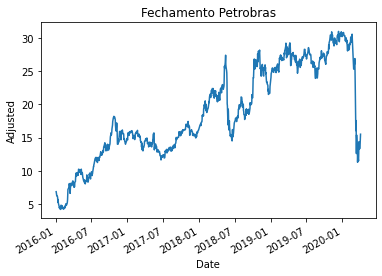

In [11]:
#this part will be covered in the next seccion, but let's see some examples:
stocksclose.dropna(subset=["PETR4.SA"], axis=0, inplace = True) #axis=0 drop row; axis=1 drop collumn
import matplotlib.pyplot as plt
stocksclose['PETR4.SA'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("Fechamento Petrobras")
plt.style.use('dark_background')
plt.show()

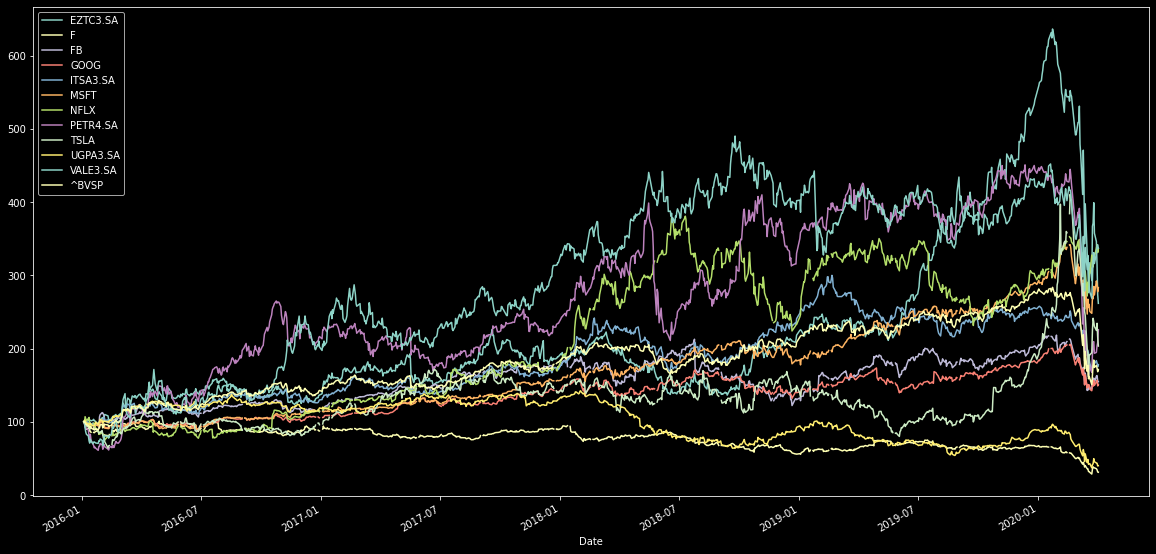

In [12]:
(stocksclose / stocksclose.iloc[0] * 100).plot(figsize = (20, 10))